In [66]:
%matplotlib inline
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from SAMPEX_functions import read_counts as read
from SAMPEX_functions import mb_finder, read_days, mb_magnitude, iso_calculator, OrbAtt_augment_loop
import pandas as pd
import os
import pathlib
import string
import datetime

In [67]:
OrbAtt_names = np.array([])
index_list = np.arange(36,51)

for i in index_list:
    OrbAtt_names = np.append(OrbAtt_names, f'SAMPEX_PSSet_Data ({i}).txt')

In [68]:
print(OrbAtt_names)

['SAMPEX_PSSet_Data (36).txt' 'SAMPEX_PSSet_Data (37).txt'
 'SAMPEX_PSSet_Data (38).txt' 'SAMPEX_PSSet_Data (39).txt'
 'SAMPEX_PSSet_Data (40).txt' 'SAMPEX_PSSet_Data (41).txt'
 'SAMPEX_PSSet_Data (42).txt' 'SAMPEX_PSSet_Data (43).txt'
 'SAMPEX_PSSet_Data (44).txt' 'SAMPEX_PSSet_Data (45).txt'
 'SAMPEX_PSSet_Data (46).txt' 'SAMPEX_PSSet_Data (47).txt'
 'SAMPEX_PSSet_Data (48).txt' 'SAMPEX_PSSet_Data (49).txt'
 'SAMPEX_PSSet_Data (50).txt']


In [69]:
PA_list = np.array([])

for i in np.arange(len(index_list)):
    OrbAtt_file = pd.read_csv(OrbAtt_names[i], names = ['Pitch'], header = 70)
    PA_i = OrbAtt_file.values[:,0]
    PA_list = np.append(PA_list, PA_i)
    print(len(PA_list))

172800
561600
950400
1339200
1728000
2116800
2505600
2894400
3283200
3672000
4060800
4449600
4838400
5227200
5256000


Percentage of data within 5 degrees of parallel: 1.30%


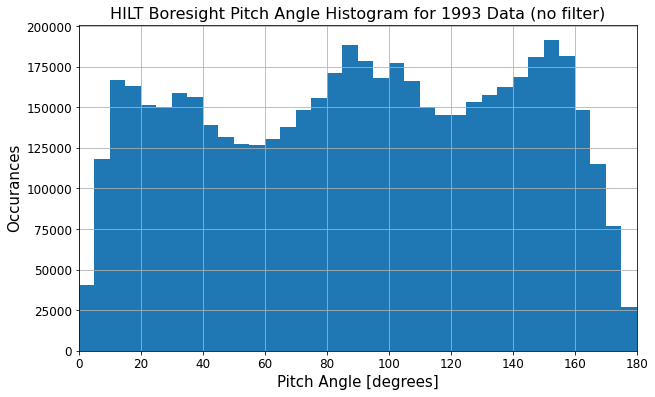

In [116]:
plt.figure(figsize = (10,6))
plt.title('HILT Boresight Pitch Angle Histogram for 1993 Data (no filter)', fontsize = 16)
plt.xlabel('Pitch Angle [degrees]', fontsize = 15)
plt.ylabel('Occurances', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0,180)
plt.grid(True)
HIST = plt.hist(PA_list, bins=36)

percentage = (HIST[0][0]+HIST[0][-1])/np.sum(HIST[0][1:-1])*100

print(f'Percentage of unfiltered data within 5 degrees of parallel: {percentage:.2f}%')

Percentage of filtered data within 5 degrees of parallel: 3.18%


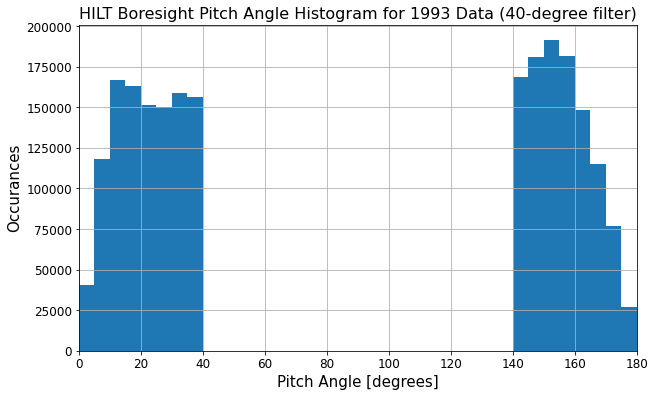

In [124]:
mask = np.abs(90 - PA_list) >= 50


plt.figure(figsize = (10,6))
plt.title('HILT Boresight Pitch Angle Histogram for 1993 Data (40-degree filter)', fontsize = 16)
plt.xlabel('Pitch Angle [degrees]', fontsize = 15)
plt.ylabel('Occurances', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0,180)
plt.grid(True)
HIST_filtered = plt.hist(PA_list[mask], bins=36)

percentage = (HIST_filtered[0][0]+HIST_filtered[0][-1])/np.sum(HIST_filtered[0][1:-1])*100

print(f'Percentage of filtered data within 5 degrees of parallel: {percentage:.2f}%')